In [45]:
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load Data

In [ ]:
filename = 'data/evaluation_data.csv'
df = pd.read_csv(filename)

print("Data Overview:")
display(df.head())

Data Overview:


,timestamp,sample_id,target_angle,raw_angle,filtered_angle
0,0.048961,1,108.0,108.393227,108.073783
1,0.099166,1,108.0,108.009358,108.063808
2,0.132990,1,108.0,108.182171,108.082613
3,0.164971,1,108.0,107.618170,107.996769
4,0.248969,1,108.0,107.446899,107.891612


## 2. Metrics

In [47]:
# --- CONFIGURATION ---
TOLERANCE = 1.0  # The "Corridor" width (+/- degrees)

# --- CALCULATIONS ---
# 1. Calculate Absolute Error
df['error_raw'] = abs(df['raw_angle'] - df['target_angle'])
df['error_filt'] = abs(df['filtered_angle'] - df['target_angle'])

# 2. Check if inside Corridor (Boolean)
df['in_corridor_raw'] = df['error_raw'] <= TOLERANCE
df['in_corridor_filt'] = df['error_filt'] <= TOLERANCE

# 3. Calculate Global MAE (Mean Absolute Error)
mae_raw = df['error_raw'].mean()
mae_filt = df['error_filt'].mean()

print(f"Global Results:")
print(f"MAE Raw Signal:      {mae_raw:.2f} degrees")
print(f"MAE Filtered Signal: {mae_filt:.2f} degrees")
print(f"Improvement:         {(mae_raw - mae_filt):.2f} degrees")

Global Results:
MAE Raw Signal:      1.13 degrees
MAE Filtered Signal: 0.95 degrees
Improvement:         0.18 degrees


## 3. Visualization

### 3.1 Plot the signals of all samples over time.

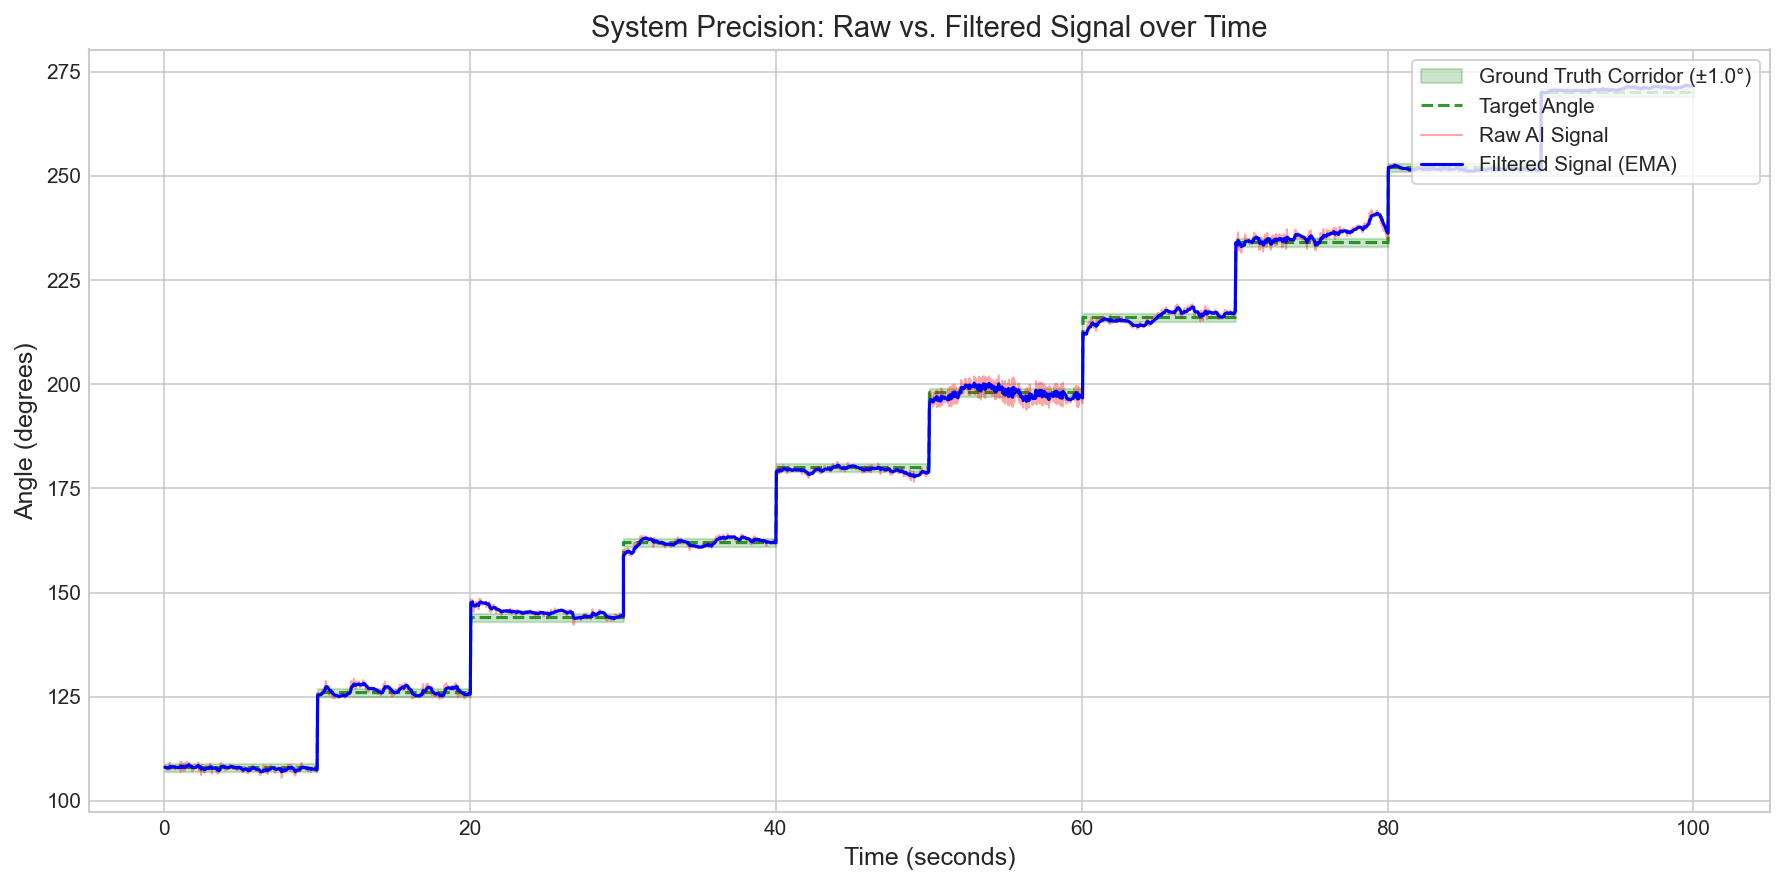

In [48]:
plt.figure(figsize=(12, 6), dpi=150)

# 1. Plot the Tolerance Corridor
# We fill the area between Target-Tolerance and Target+Tolerance
plt.fill_between(df['timestamp'], 
                 df['target_angle'] - TOLERANCE, 
                 df['target_angle'] + TOLERANCE, 
                 color='green', alpha=0.2, label=f'Ground Truth Corridor (±{TOLERANCE}°)')

# 2. Plot the Target Line (Ground Truth)
plt.plot(df['timestamp'], df['target_angle'], 'g--', linewidth=1.5, alpha=0.8, label='Target Angle')

# 3. Plot the Signals
plt.plot(df['timestamp'], df['raw_angle'], 'r-', linewidth=1, alpha=0.35, label='Raw AI Signal')
plt.plot(df['timestamp'], df['filtered_angle'], 'b-', linewidth=1.5, label='Filtered Signal (EMA)')

plt.title('System Precision: Raw vs. Filtered Signal over Time', fontsize=14)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Angle (degrees)', fontsize=12)
plt.legend(loc='upper right', frameon=True)

plt.tight_layout()
plt.show()

### 3.2 Plot the signals of one sample over time.

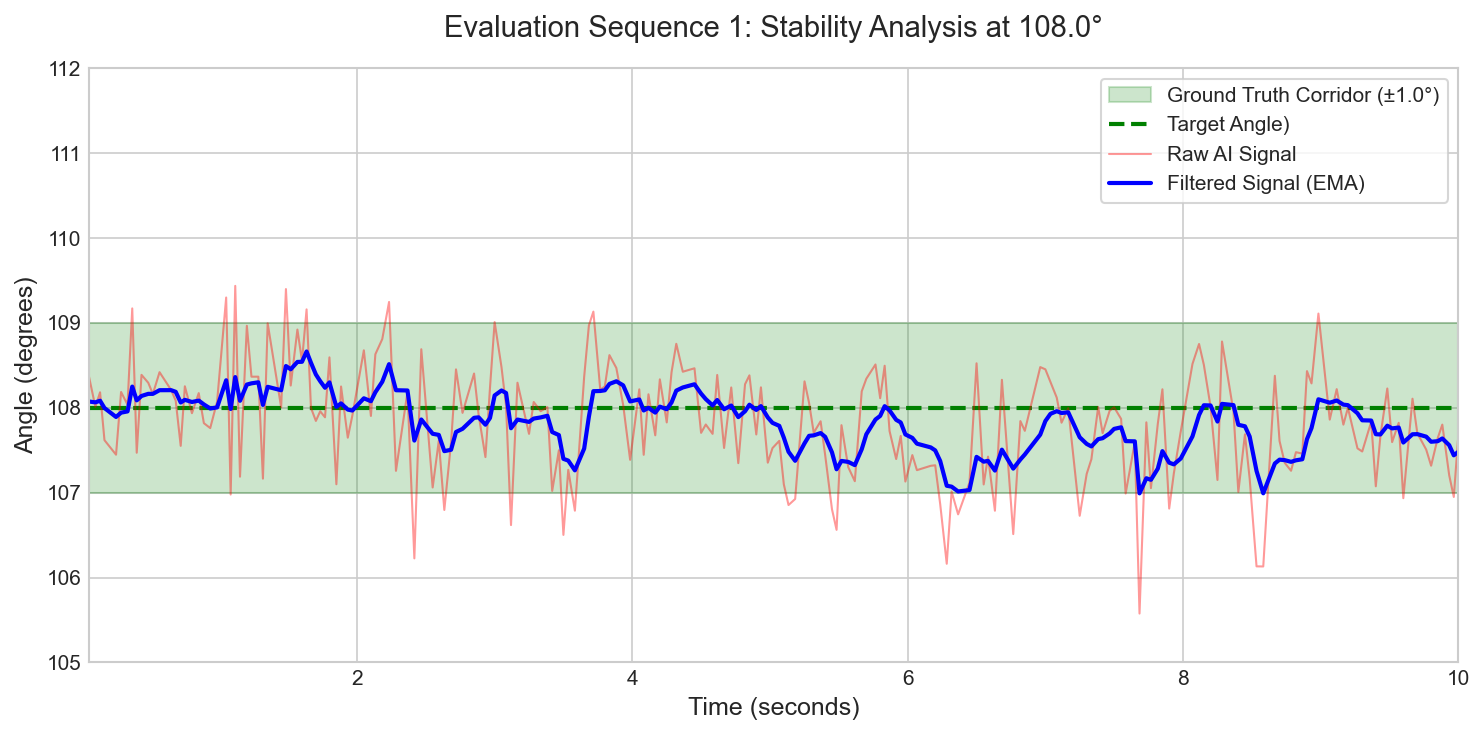

In [49]:
# --- 1. FILTER FOR FIRST SEQUENCE (108°) ---
# Assuming the first 10 seconds or sample_id == 1
df_first = df[df['sample_id'] == 1].copy()
target_val = 108.0
TOLERANCE = 1.0

# --- 2. PLOT ---
plt.figure(figsize=(10, 5), dpi=150)

# Plot the Tolerance Corridor (Ground Truth +/- 1.0)
plt.fill_between(df_first['timestamp'], 
                 target_val - TOLERANCE, 
                 target_val + TOLERANCE, 
                 color='green', alpha=0.2, label=f'Ground Truth Corridor (±{TOLERANCE}°)')

# Plot Target Angle
plt.plot(df_first['timestamp'], df_first['target_angle'], 'g--', linewidth=2, label=f'Target Angle)')

# Plot Raw Signal (Red)
plt.plot(df_first['timestamp'], df_first['raw_angle'], 'r-', linewidth=1, alpha=0.4, label='Raw AI Signal')

# Plot Filtered Signal (Blue)
plt.plot(df_first['timestamp'], df_first['filtered_angle'], 'b-', linewidth=2, label='Filtered Signal (EMA)')

# --- 3. ANNOTATIONS & LABELS ---
plt.title(f'Evaluation Sequence 1: Stability Analysis at {target_val}°', fontsize=14, pad=15)
plt.xlabel('Time (seconds)', fontsize=12)
plt.ylabel('Angle (degrees)', fontsize=12)

# Set axis limits
plt.ylim(105, 112)
plt.xlim(df_first['timestamp'].min(), df_first['timestamp'].max())

plt.legend(loc='upper right', frameon=True, fontsize=10)
plt.tight_layout()


plt.show()

### 3.3 Accuracy Comparison

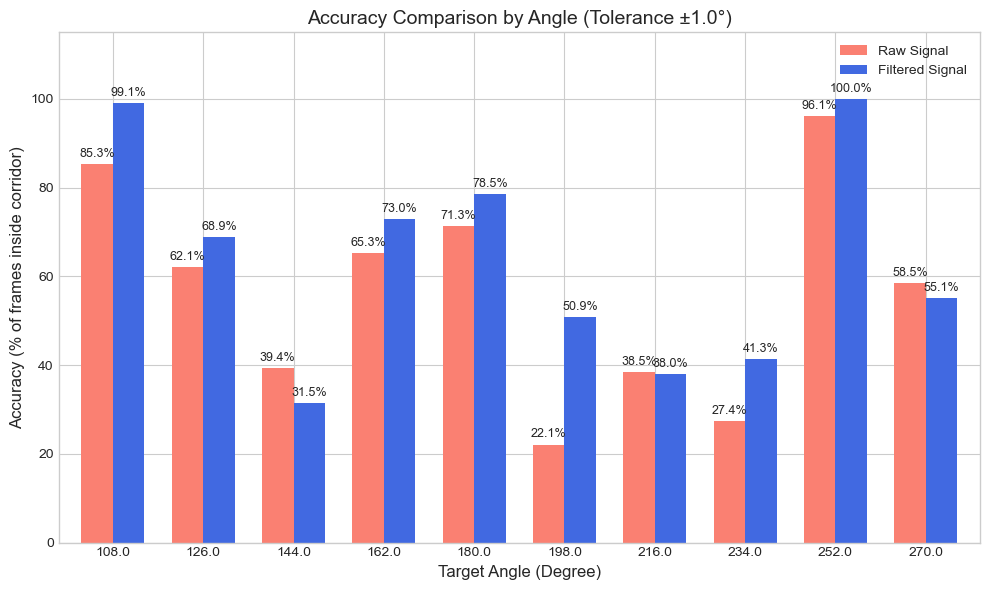

In [50]:
# Group data by Sample ID (or Target Angle) to get accuracy per specific angle
grouped = df.groupby('target_angle')[['in_corridor_raw', 'in_corridor_filt']].mean() * 100

# Create Bar Plot
ax = grouped.plot(kind='bar', figsize=(10, 6), color=['salmon', 'royalblue'], width=0.7)

plt.title(f'Accuracy Comparison by Angle (Tolerance ±{TOLERANCE}°)', fontsize=14)
plt.ylabel('Accuracy (% of frames inside corridor)', fontsize=12)
plt.xlabel('Target Angle (Degree)', fontsize=12)
plt.ylim(0, 115) # Leave space for text labels
plt.legend(['Raw Signal', 'Filtered Signal'])
plt.xticks(rotation=0)

# Add text labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3, fontsize=9)

plt.tight_layout()
plt.show()